# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


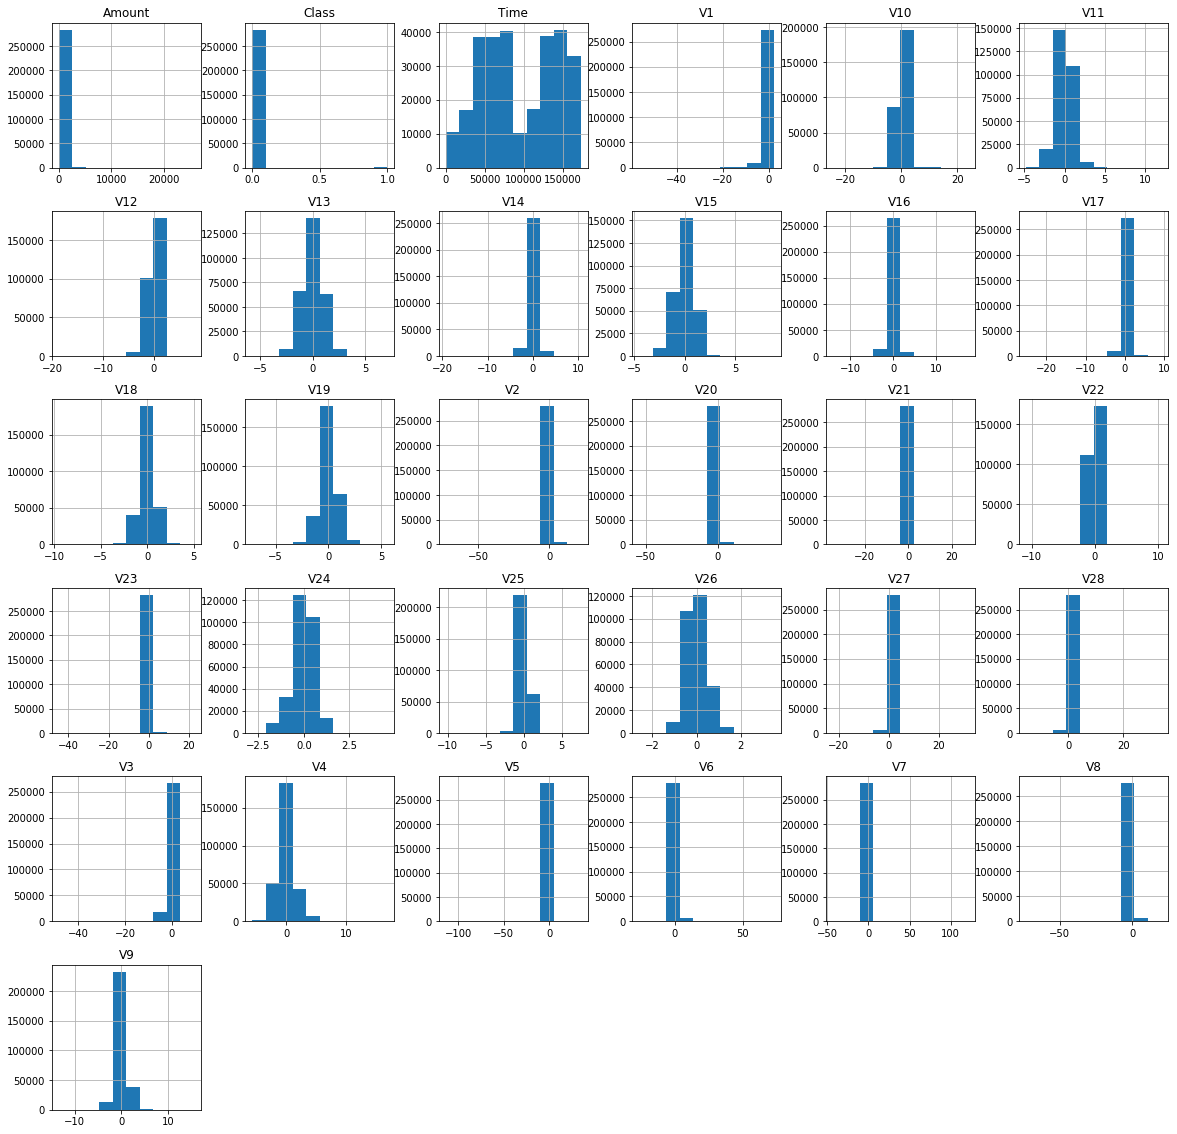

In [3]:
data.hist(figsize=(20,20))
plt.show()

In [4]:
X = data.drop(columns=['Class']).drop(columns=['Time']).drop(columns=['Amount'])
y = data['Class']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [6]:
# const

y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const

# log_reg

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# knn - ооооочень долго компилирует

# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# y_pred_knn = knn.predict(X_test)
# y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_const))

0.9992626663389628


NameError: name 'y_pred_knn' is not defined

In [8]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_pred_log_reg))
print(precision_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_const))

0.8762886597938144


NameError: name 'y_pred_knn' is not defined

In [9]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred_log_reg))
print(recall_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_const))

0.625


NameError: name 'y_pred_knn' is not defined

In [10]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred_log_reg))
print(f1_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_const))

0.7296137339055795


NameError: name 'y_pred_knn' is not defined

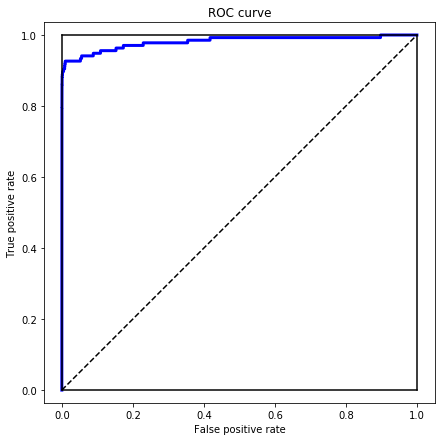

In [11]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_proba_log_reg))
print(roc_auc_score(y_test, y_pred_proba_knn))
print(roc_auc_score(y_test, y_pred_proba_const))

0.9810236419464923


NameError: name 'y_pred_proba_knn' is not defined

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

In [13]:
X = data.drop(columns=['Class']).drop(columns=['Time']).drop(columns=['Amount'])
y = data['Class']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# print('accuracy:', accuracy_score(y_test, y_pred_log_reg))
# print('precision:', precision_score(y_test, y_pred_log_reg))
# print('recall:', recall_score(y_test, y_pred_log_reg))
# print('f1:', f1_score(y_test, y_pred_log_reg))
# print('roc_auc:', roc_auc_score(y_test, y_pred_proba_log_reg))

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

precisions = []
recalls = []
f1 = []
roc_auc = []

for w in np.arange(8.8, 9, 0.01):
    log_reg_w =LogisticRegression(class_weight = { 0:1 , 1:w})
    log_reg_w.fit(X_train, y_train)
    
    y_pred_w = log_reg_w.predict(X_test)
    y_pred_w_proba_log_reg = log_reg_w.predict_proba(X_test)[:, 1]

    precisions.append(precision_score(y_test, y_pred_w))
    recalls.append(recall_score(y_test, y_pred_w))
    f1.append(f1_score(y_test, y_pred_w))
    roc_auc.append(roc_auc_score(y_test, y_pred_w_proba_log_reg))
    
plt.plot(np.arange(8.8, 9, 0.01), precisions, c = 'blue')
plt.plot(np.arange(8.8, 9, 0.01), recalls, c = 'green')
plt.plot(np.arange(8.8, 9, 0.01), f1, c = 'orange')
plt.plot(np.arange(8.8, 9, 0.01), roc_auc, c = 'red')

print('w(precisions) =', 8.8 + 0.01*precisions.index(max(precisions)))
print('w(recalls) =', 8.8 + 0.01*recalls.index(max(recalls)))
print('w(f1) =', 8.8 + 0.01*f1.index(max(f1)))
print('w(roc_auc) =', 8.8 + 0.01*roc_auc.index(max(roc_auc)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [16]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
# knn

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

precisions = []
recalls = []
f1 = []
roc_auc = []

for i in np.arange(0.1, 0.6, 0.1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)

    for n in np.arange(1, 6):
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)

        y_pred_knn = knn.predict(X_test)
        y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

        precisions.append((precision_score(y_test, y_pred_knn), i, n))
        recalls.append((recall_score(y_test, y_pred_knn), i, n))
        f1.append((f1_score(y_test, y_pred_knn), i, n))
        roc_auc.append((roc_auc_score(y_test, y_pred_proba_knn), i, n))
        
precisions.sort(key=lambda x: x[0])
recalls.sort(key=lambda x: x[0])
f1.sort(key=lambda x: x[0])
roc_auc.sort(key=lambda x: x[0])

print(precisions[-1])
print(recalls[-1])
print(f1[-1])
print(roc_auc[-1])

%time

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?